<h1>Lowest Error Best Action</h1>


<h2> LEBA - Training </h2>

Here we can compute the lowest error fixed trajectory over the training set in the vision and touch only poking setting. We set greedy_checks = 2 to approximate the best action and increase speed.  

In [1]:
import os
from pterotactyl.policies.dataset_specific import LEBA
from pterotactyl import pretrained


class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "LEBA_example"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = False 
        self.greedy_checks = 2
        self.pretrained_recon = True
        self.pretrained = False
        
    

params = Params()
trainer = LEBA.Engine(params)
trainer()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2933.91it/s]


The number of RL_train set objects found : 122


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 32686.28it/s]


The number of valid set objects found : 34
argv[0]=
argv[0]=
Getting best action for step 1


  0%|          | 0/61 [00:00<?, ?it/s]

Getting best action for step 2


  0%|          | 0/61 [00:00<?, ?it/s]

Getting best action for step 3


  0%|          | 0/61 [00:00<?, ?it/s]

Getting best action for step 4


  0%|          | 0/61 [00:00<?, ?it/s]

Getting best action for step 5


  0%|          | 0/61 [00:00<?, ?it/s]

<h2> LEBA - Evaluation </h2>

We now evaluate the trained moddel. Because we run with the visualize paramater as true we can view predicted objects. 

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 4489.13it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


  0%|          | 0/6 [00:00<?, ?it/s]

Valid || score: 1.1331, reward = -0.1331
Valid || score: 1.0240, reward = -0.0240
Valid || score: 0.6874, reward = 0.3126
Valid || score: 1.0751, reward = -0.0751
Valid || score: 1.0194, reward = -0.0194
Valid || score: 1.0137, reward = -0.0137
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=
percentage in vision is 20.00 % for policy
******************************
*********************************************
Total Valid || score: 0.9921, reward = 0.0079
*********************************************


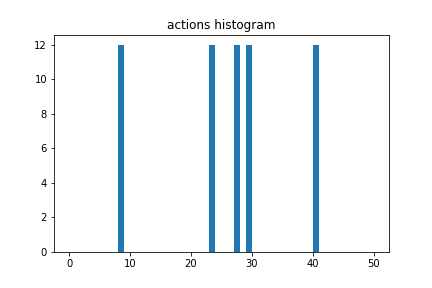




   Projected Actions


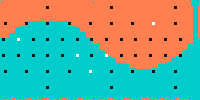

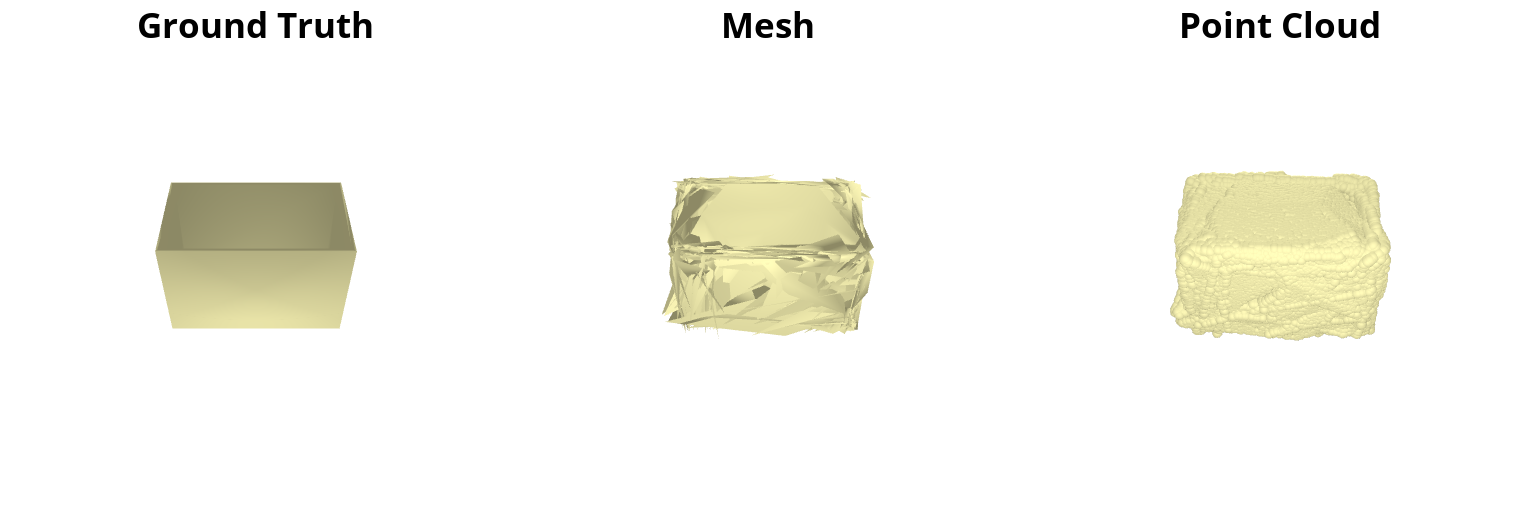

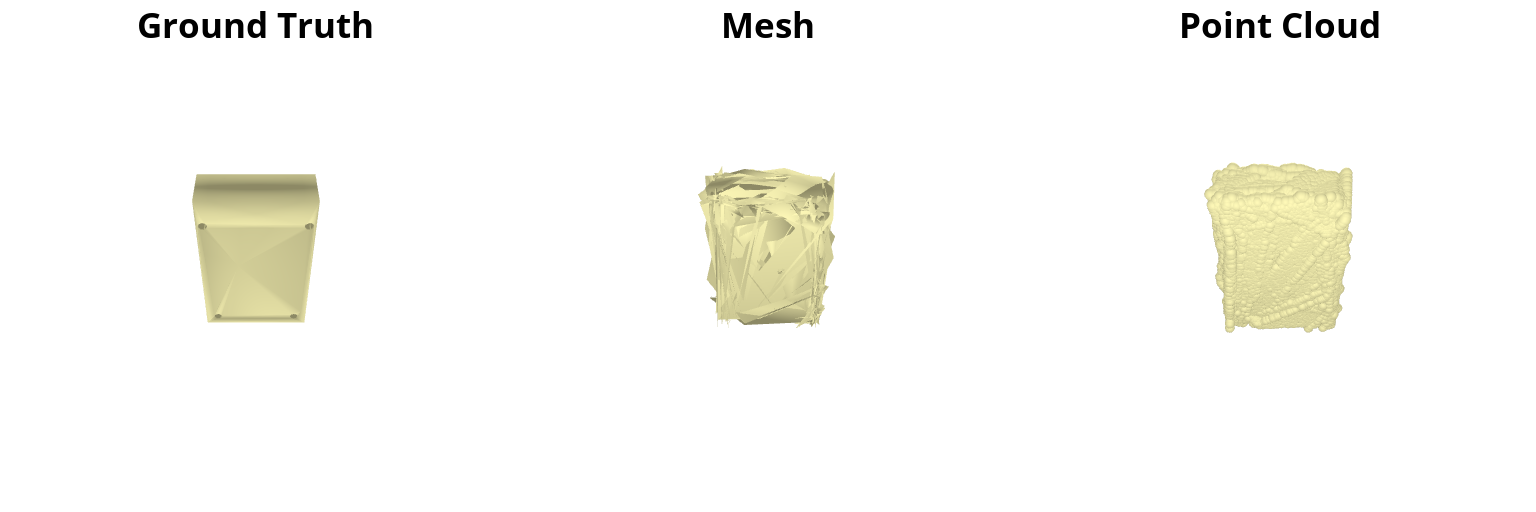

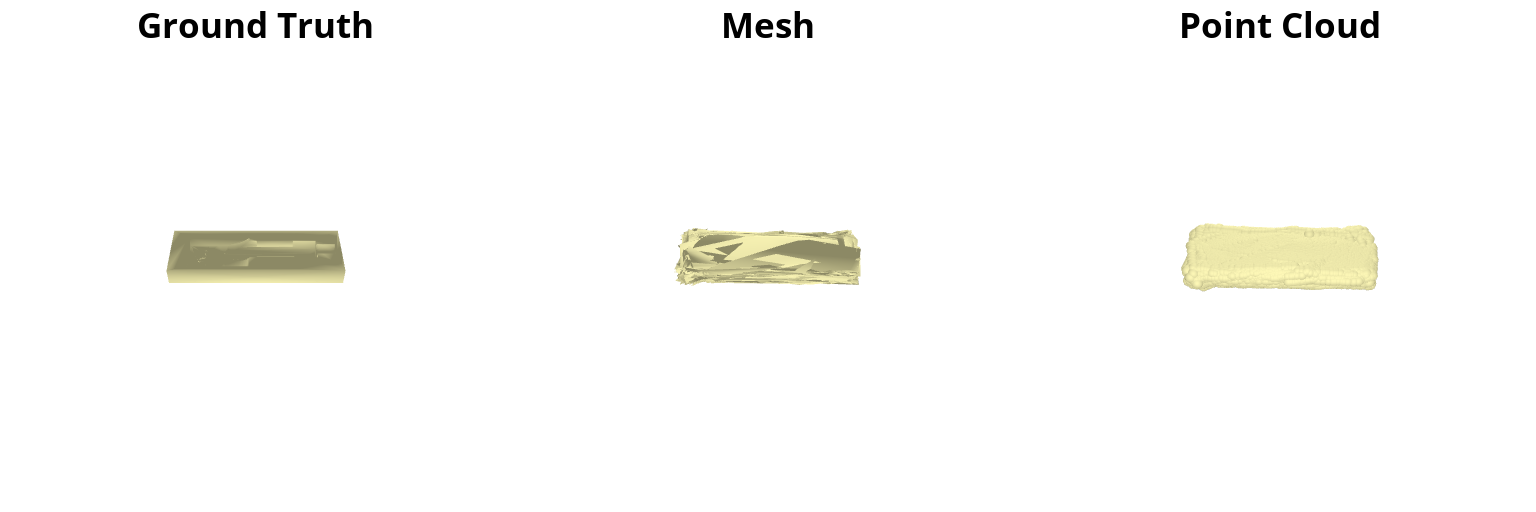

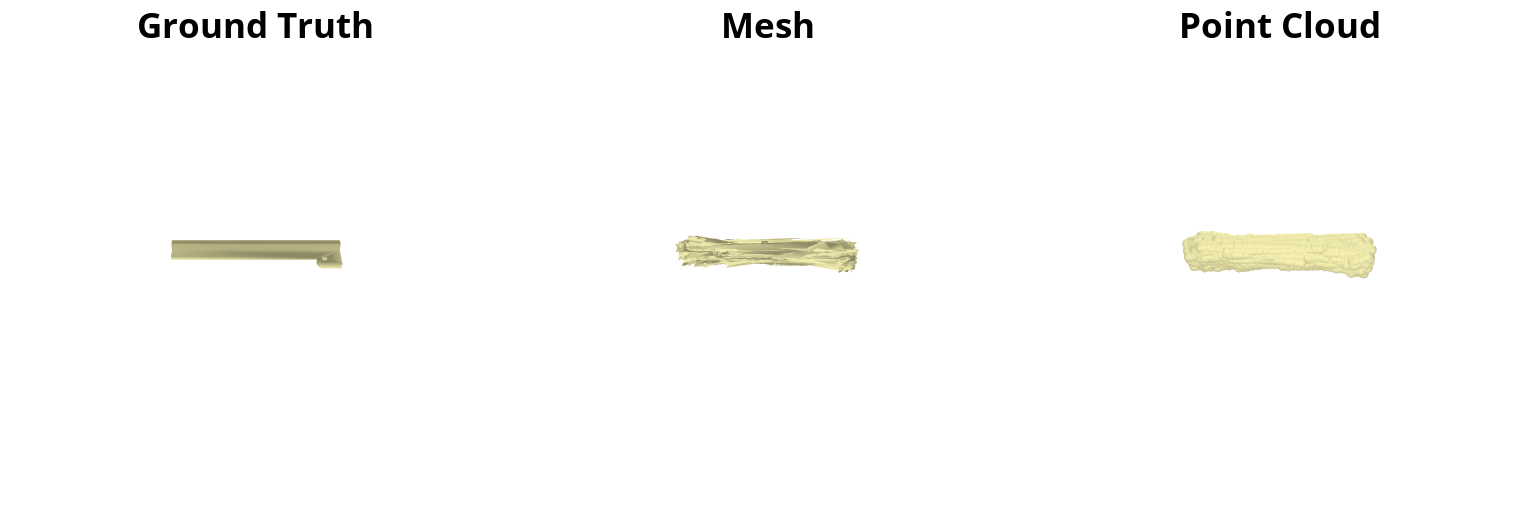

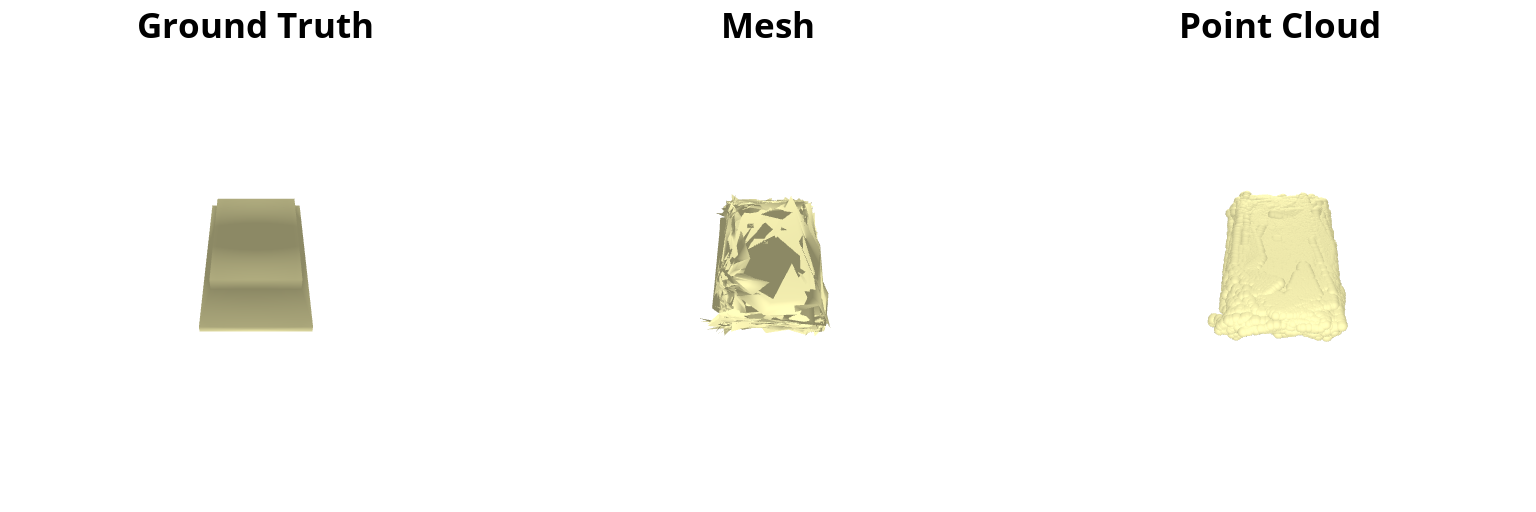

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


params.eval = True 
params.visualize = True
tester = LEBA.Engine(params)
tester()


histogram = Image.open('results/LEBA_example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/LEBA_example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/LEBA_example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)

<h2> LEBA - Pretrained </h2>

We now evaliate the pretrained models in the same setting: 

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3610.05it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


  0%|          | 0/6 [00:00<?, ?it/s]

Valid || score: 1.3014, reward = -0.3014
Valid || score: 0.9186, reward = 0.0814
Valid || score: 0.6920, reward = 0.3080
Valid || score: 0.9289, reward = 0.0711
Valid || score: 0.9653, reward = 0.0347
Valid || score: 0.9785, reward = 0.0215
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=
percentage in vision is 60.00 % for policy
******************************
*********************************************
Total Valid || score: 0.9641, reward = 0.0359
*********************************************


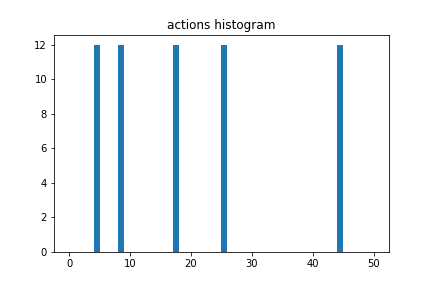




   Projected Actions


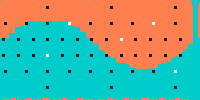

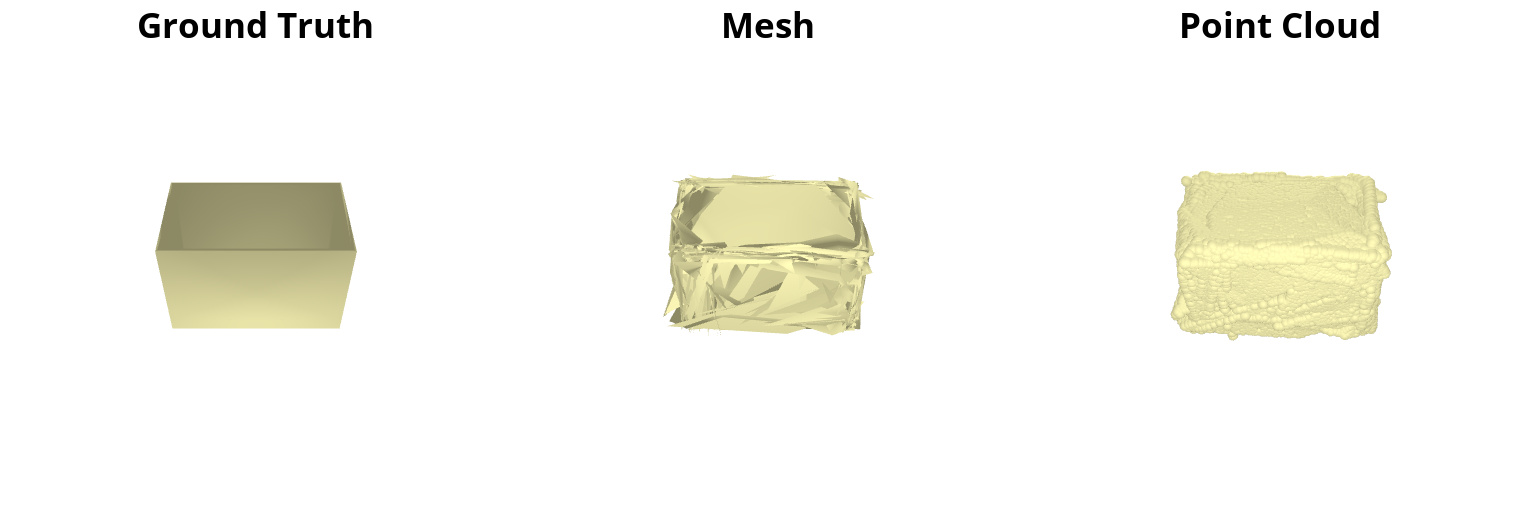

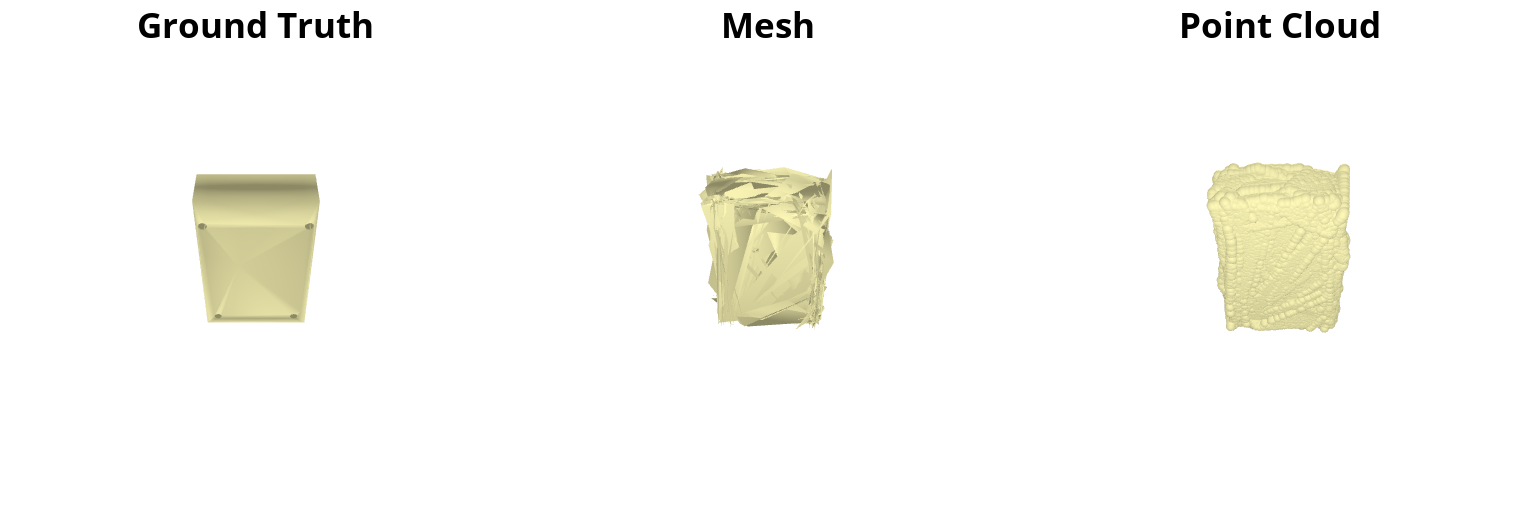

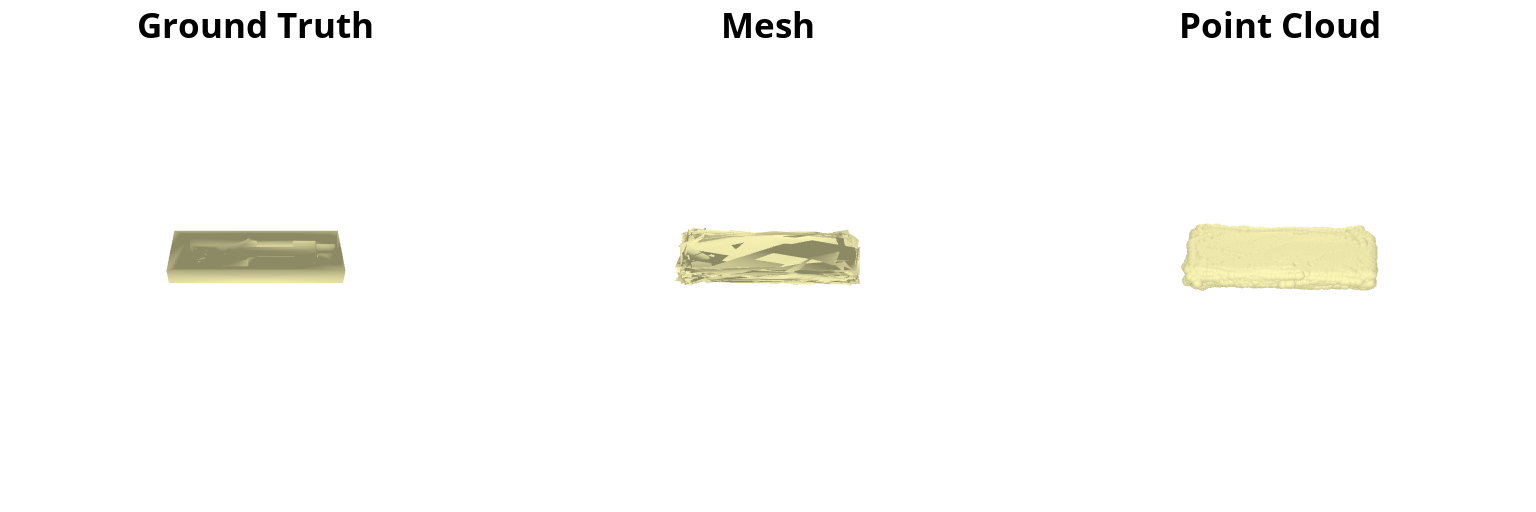

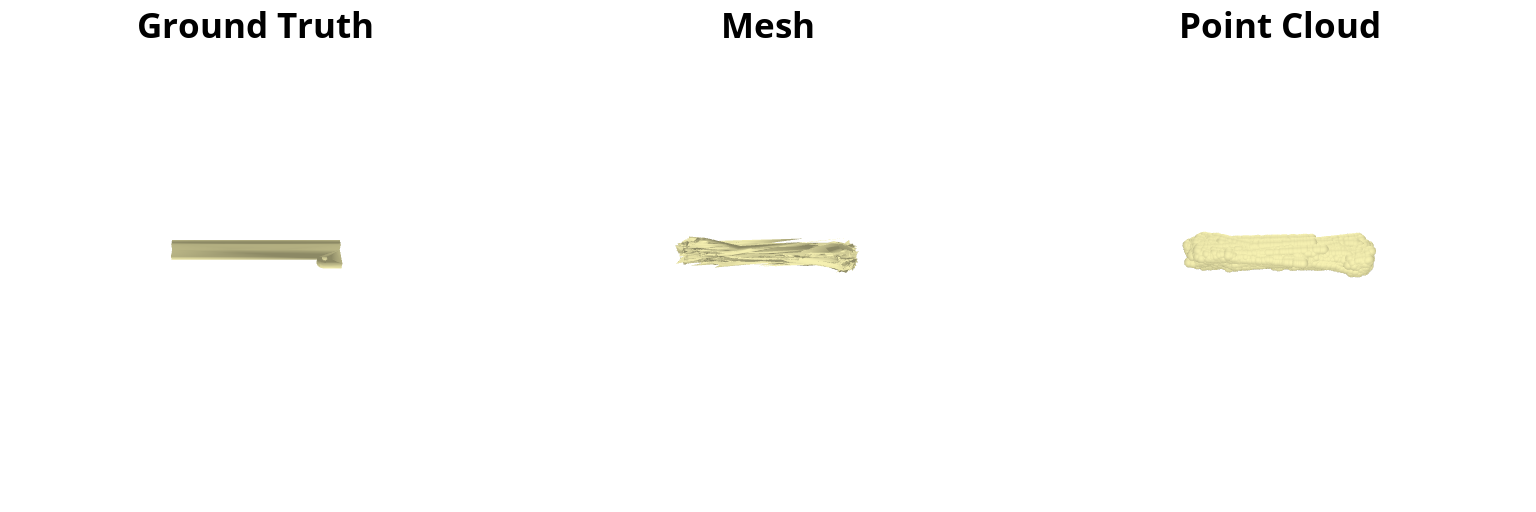

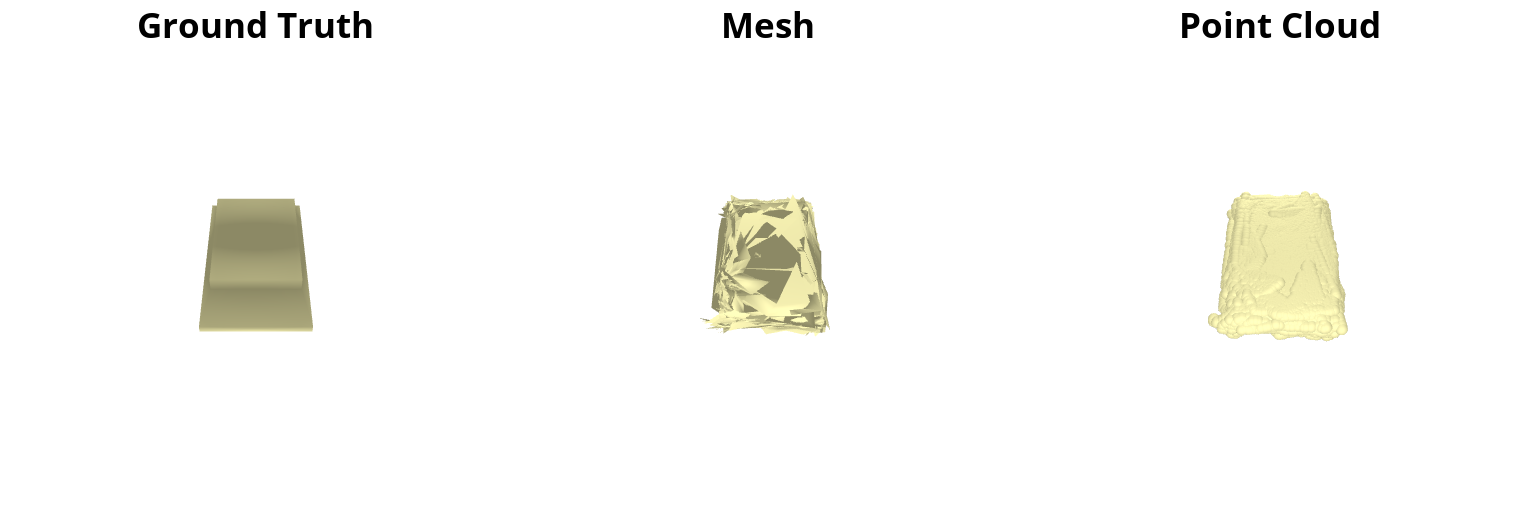

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
from pterotactyl.policies.dataset_specific import LEBA

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'



class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.exp_type = "LEBA_pre"
        self.finger = True 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = False
        self.use_recon = True 
        self.eval = True 
        self.greedy_checks = 50
        self.pretrained_recon = True
        self.pretrained = True 
        
    

params = Params()
eval = LEBA.Engine(params)
eval()


histogram = Image.open('results/LEBA_pre/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/LEBA_pre/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/LEBA_pre/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)






